In [23]:
import math
import lasio
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

%matplotlib inline

In [3]:
well_6_composite_las = lasio.read("../data/PETROPHYSICS/WELL-6G-1.3_REVISED_CLIPS_2019.LAS")
# well_6_composite_las.header

In [4]:
curves = []
for curve in well_6_composite_las.curves:
    curves.append(curve.mnemonic)
    
print(curves)

['DEPTH', 'COALF', 'DENS_P', 'DTC_P', 'GR_P', 'NEUT_P', 'PERM', 'PHIE', 'PHIT', 'RT_P', 'SWE', 'SWT', 'VCLB', 'VCLD', 'VCLW', 'VDOLO', 'VGAS', 'VLIME', 'VOIL', 'VSAND', 'VSHALE', 'VSILT', 'VWATER']


In [5]:
def cleanup_las(arr):
    cfunc = np.vectorize(lambda t: float(str(t).replace(",","")))
    return cfunc(arr)

In [6]:
def get_revised(well_data):
    DEPTH_data_data = cleanup_las(well_data.curves["DEPTH"].data)
    DENS_P_data = cleanup_las(well_data.curves["DENS_P"].data)
    DTC_P_data = cleanup_las(well_data.curves["DTC_P"].data)
    RT_P_data = cleanup_las(well_data.curves["RT_P"].data)
    GR_P_data = cleanup_las(well_data.curves["GR_P"].data)
    NEUT_P_data = cleanup_las(well_data.curves["NEUT_P"].data)
    
    data = {
      "DEPTH": DEPTH_data_data,
      "DENS_P": DENS_P_data,
      "DTC_P": DTC_P_data,
      "RT_P": RT_P_data,
      "GR_P": GR_P_data,
      "NEUT_P": NEUT_P_data
    }
    return data
    
    
def get_composite(well_6_composite_las):
    DEPTH_data = well_6_composite_las.curves["DEPTH"].data
    CALI_data = well_6_composite_las.curves["CALI"].data
    DENB_data = well_6_composite_las.curves["DENB"].data
    DRHO_data = well_6_composite_las.curves["DRHO"].data
    DTCOMP_data = well_6_composite_las.curves["DTCOMP"].data
    GR_data = well_6_composite_las.curves["GR"].data
    NEUT_data = well_6_composite_las.curves["NEUT"].data
    PEF_data = well_6_composite_las.curves["PEF"].data
    RDEEP_data = well_6_composite_las.curves["RDEEP"].data
    RMICRO_data = well_6_composite_las.curves["RMICRO"].data
    RSHAL_data = well_6_composite_las.curves["RSHAL"].data

    all_data = {
      "DEPTH_data": DEPTH_data,
      "CALI_data": CALI_data, # G
      "DENB_data": DENB_data, # D
      "DRHO_data": DRHO_data, 
      "DTCOMP_data": DTCOMP_data, # D
      "GR_data": GR_data, # G
      "NEUT_data": NEUT_data, # D
      "PEF_data": PEF_data,
      "RDEEP_data": RDEEP_data, # R
      "RMICRO_data": RMICRO_data, # R
      "RSHAL_data": RSHAL_data # R
    }
    return all_data

In [7]:
well_data = get_revised(well_6_composite_las)

DEPTH <br/>
DENS_P <br/>
DTC_P <br/>

RT_P

GR_P

NEUT_P

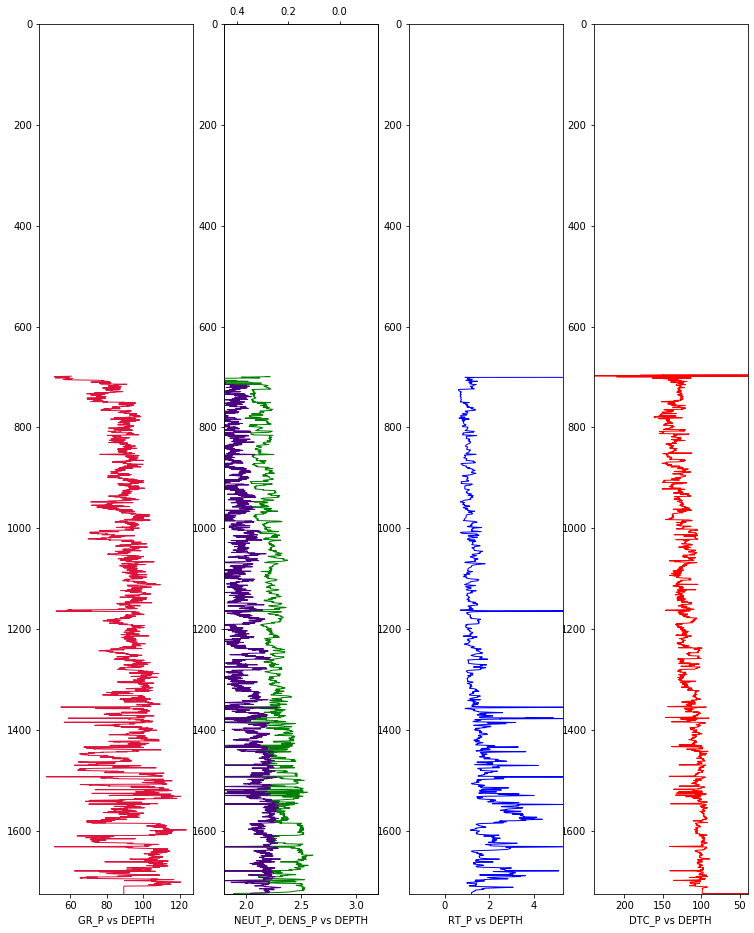

In [21]:
lineweight = 1

fig = plt.figure(figsize=(16,16))

ax1 = fig.add_subplot(152)
ax1.plot(well_data["DENS_P"], well_data["DEPTH"], color='green', lw=lineweight)
ax1.set_xlabel("NEUT_P, DENS_P vs DEPTH")
ax1.set_xlim(1.8, 3.2)
ax1.set_ylim(well_data["DEPTH"][-1], 0)

ax11 = ax1.twiny()
ax11.plot(well_data["NEUT_P"], well_data["DEPTH"], color='indigo', lw=lineweight)
ax11.set_xlim(0.45, -0.15)
ax11.set_ylim(well_data["DEPTH"][-1], 0)

ax2 = fig.add_subplot(154)
ax2.plot(well_data["DTC_P"], well_data["DEPTH"], color='red', lw=lineweight)
ax2.set_xlabel("DTC_P vs DEPTH")
ax2.set_xlim(240, 40)
ax2.set_ylim(well_data["DEPTH"][-1], 0)


ax3 = fig.add_subplot(153)
ax3.plot(well_data["RT_P"], well_data["DEPTH"], color='blue', lw=lineweight)
ax3.set_xlabel("RT_P vs DEPTH")
ax3.set_xlim(math.log(0.2), math.log(200))
ax3.set_ylim(well_data["DEPTH"][-1], 0)


ax4 = fig.add_subplot(151)
ax4.plot(well_data["GR_P"], well_data["DEPTH"], color='crimson', lw=lineweight)
ax4.set_xlabel("GR_P vs DEPTH")
ax4.set_ylim(well_data["DEPTH"][-1], 0)


plt.savefig('Well6-revised.png')
plt.show();